# The Ford GoBike System Data
## by John Magdy

## Investigation Overview

> Visualizing finding from the collected data, finding patterns, information about certian people in the data and how we can understand these findings.

## Dataset Overview

> The Ford GoBike Dataset being used is the 2018 data seperated for each month of the year it inclued information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. by grouping each dataset to get the entirety of 2018 data and do the required exploratory and explanatory analysis on it.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
for months in range (1,13):
    url = 'https://s3.amazonaws.com/fordgobike-data/2018'+ str(months).zfill(2) +'-fordgobike-tripdata.csv.zip'
    print(url)
    globals()["df" + str(months)] = pd.read_csv(url)

https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip


In [4]:
#merging all datframes into one
df_all= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [5]:
#converting type to datetime
df_all.start_time = pd.to_datetime(df_all.start_time)
df_all.end_time = pd.to_datetime(df_all.end_time)

In [6]:
#using the start time to seperate and get the hour,day,week,month of each bike rental
df_all['start_date'] = df_all.start_time.dt.strftime('%Y-%m-%d')
df_all['start_month'] = df_all.start_time.dt.strftime('%B')
df_all['start_week'] = df_all.start_time.dt.strftime('%A')
df_all['start_day'] = df_all.start_time.dt.strftime('%H')

In [7]:
#calculating age
df_all['member_age'] = 2018-df_all['member_birth_year']

In [8]:
#duration from seconds to minutes
df_all['duration_min'] = df_all['duration_sec'] / 60

In [9]:
df_all.rename(columns = {'start_week':'Day'}, inplace = True)
df_all.rename(columns = {'start_month':'Month'}, inplace = True)
df_all.rename(columns = {'duration_min':'Duration'}, inplace = True)
df_all.rename(columns = {'member_gender':'Gender'}, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> in this visualization we see and compare the amount of trips and its duration for each month and week of the day. Wednesday, Tuesday ,and Saturday seems to be the most popular days to take a bike ride at while on weekends people prefer to ride their bikes for a longer amount. the trips seems to be less popular during the winter months however while the average duration of the trips themselves seems similar when compared to each month.

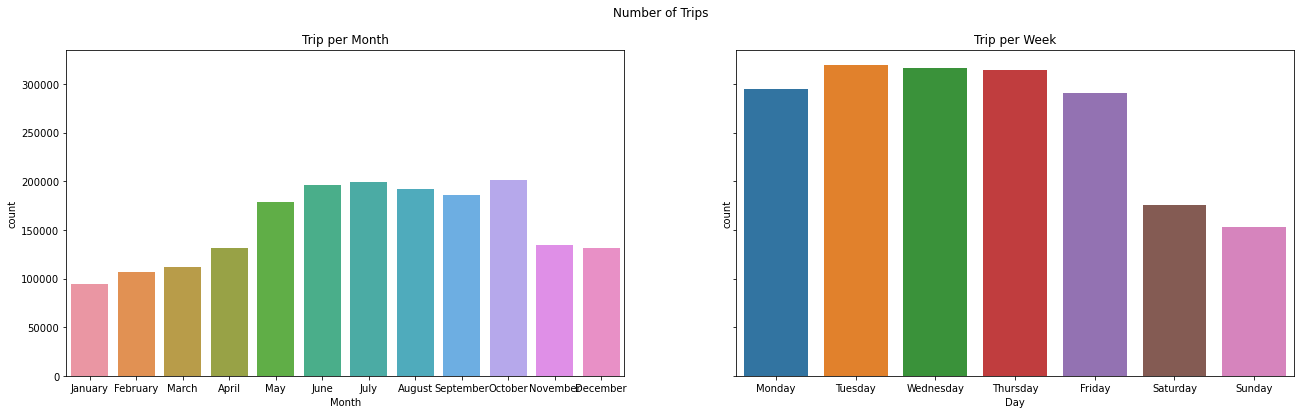

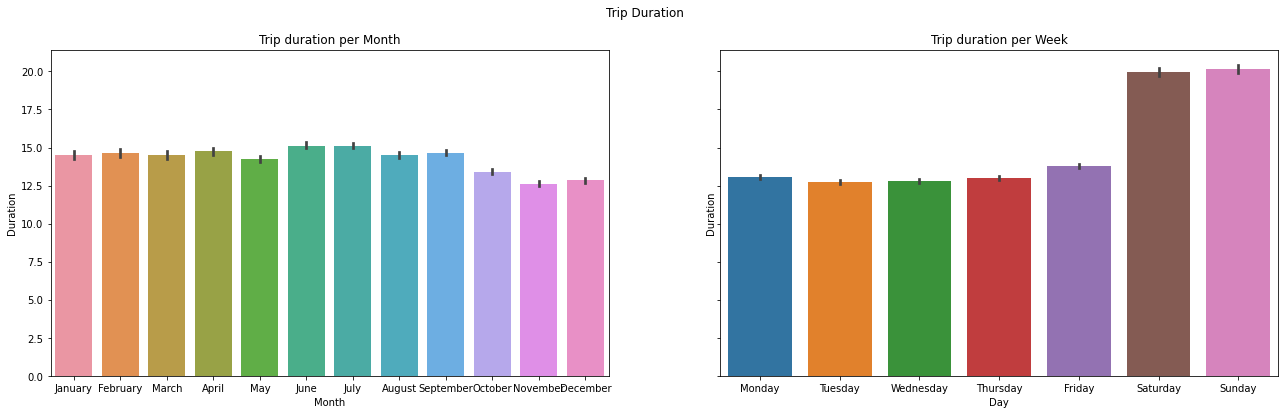

In [10]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_all["Day"] = pd.Categorical(df_all.Day, categories=days, ordered=True)
fig, axs = plt.subplots(ncols=2, figsize=(22, 6), sharey=True)
fig.suptitle('Number of Trips')
sns.countplot(data = df_all, x = 'Month', ax=axs[0]).set(title='Trip per Month')
sns.countplot(data = df_all, x = 'Day', ax=axs[1]).set(title='Trip per Week');
fig, axs = plt.subplots(ncols=2, figsize=(22, 6), sharey=True)
fig.suptitle('Trip Duration')
sns.barplot(data = df_all, x = 'Month',y='Duration',ax=axs[0]).set(title='Trip duration per Month');
sns.barplot(data = df_all, x = 'Day',y='Duration',ax=axs[1]).set(title='Trip duration per Week');

## (Visualization 2)

> In this visualization its apparent that females tend to ride their bikes longer than males in each day of the week and in general overall. during weekends in particular.

Text(0.5, 0.98, 'Male and Female Trip Duration during weekdays')

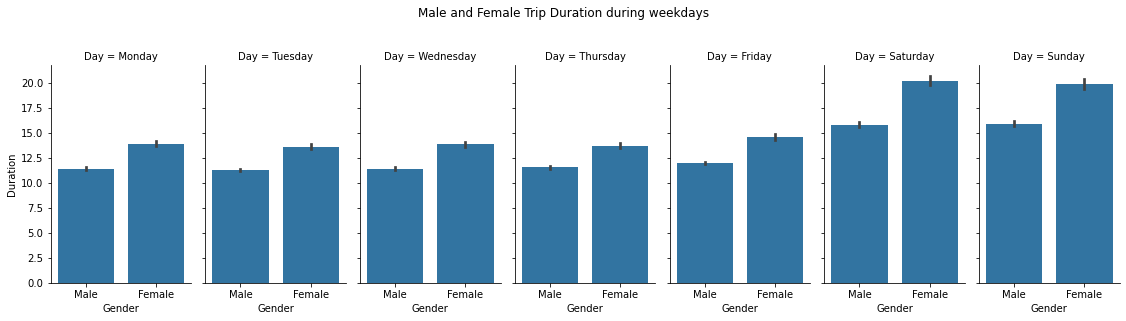

In [11]:
g = sns.FacetGrid(df_all, col="Day", height=4.5, aspect=.5)
g.map(sns.barplot, "Gender", "Duration", order=["Male", "Female"]);
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Male and Female Trip Duration during weekdays')

## (Visualization 3)

> For the customer vs subscriber activity per hour in each day of the week there is quite a noticable difference in both user types patterns. most noticable in the days is that subscribers are way less active during weekends while customers are most active in the weekends.the active hours during the normal days are usually in the early morning or between 4 pm to 7 pm while in weekends its during the mid day

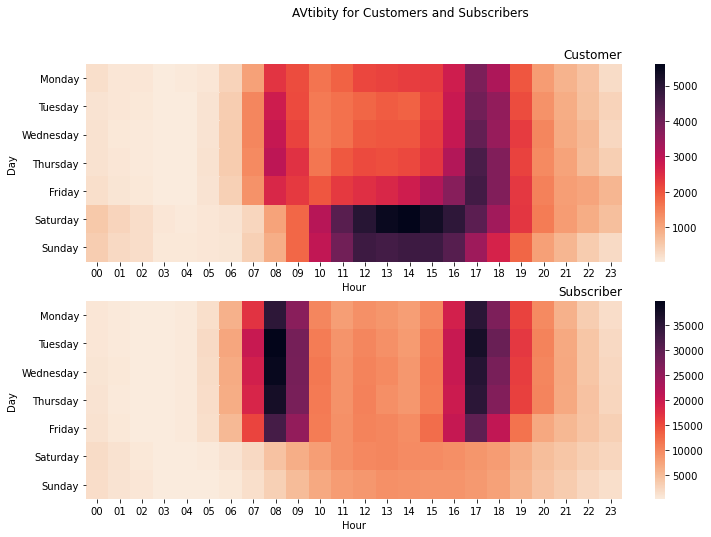

In [21]:
#master plot
plt.figure(figsize=(12,8))
plt.suptitle('AVtibity for Customers and Subscribers')
#first heatmap
plt.subplot(2, 1, 1)
customer = df_all.query('user_type == "Customer"')
first_counts = customer.groupby(['Day', 'start_day']).size()
first_counts = first_counts.reset_index(name='count')
first_counts = first_counts.pivot(index='Day', columns='start_day', values='count')
sns.heatmap(first_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour');
plt.ylabel('Day');
#second heatmap
plt.subplot(2, 1, 2)
subscribers = df_all.query('user_type == "Subscriber"')
second_counts = subscribers.groupby(['Day', 'start_day']).size()
second_counts = second_counts.reset_index(name='count')
second_counts = second_counts.pivot(index='Day', columns='start_day', values='count')
sns.heatmap(second_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour');
plt.ylabel('Day');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [22]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 669564 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\John1\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\John1\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\John1\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\John1\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\John1\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File